In [1]:
import numpy as np

In [2]:
rnd = np.random
rnd.seed(2)

In [3]:
n = 10
Q = 20
N = [i for i in range(1, n+1)]
V = [0] + N
q = {i: rnd.randint(1, 10) for i in N}

In [4]:
q

{1: 9, 2: 9, 3: 7, 4: 3, 5: 9, 6: 8, 7: 3, 8: 2, 9: 6, 10: 5}

In [5]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [6]:
loc_x

array([124.22676655, 105.82841886,  26.91598907, 102.71562425,
        36.88797313, 157.06702956, 170.79505853,  98.84736748,
       169.31229707,  15.9290954 , 101.04921802])

In [7]:
import matplotlib.pyplot as plt

(8.185797245507919, 178.53835668420206, 3.871356415729222, 62.331824920818164)

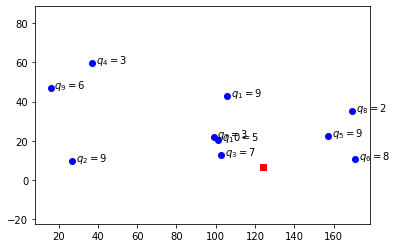

In [8]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [9]:
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}

In [16]:
from docplex.mp.model import Model

In [17]:
mdl = Model('CVRP')

In [15]:
!pip install docplex

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=a99a49119b72fe2004d2f7dc9ec4d86514bdf408b7ab907ac7aea0a217ebb2d2
  Stored in directory: c:\users\sergio\appdata\local\pip\cache\wheels\b9\32\a1\dc2abf92ec8b699d63a9a944f0f756ecdba8a7aad863376afb
Successfully built docplex


You should consider upgrading via the 'C:\Users\Sergio\anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [19]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

-- cannot find parameters matching version: , using: 20.1.0.0


DOcplexException: Cannot solve model: no CPLEX runtime found.

In [ ]:
print(solution)

In [20]:
solution.solve_status

NameError: name 'solution' is not defined

In [14]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

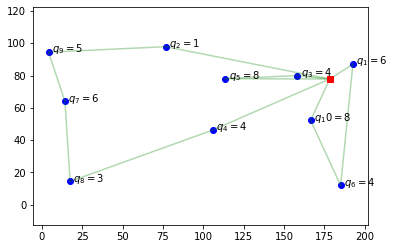

In [15]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')